# Titanic Dataset - Exploratory Data Analysis

**Questions to think about:**
* What is the most important factor in determining survival of the Titanic incident?
* In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?
* "Women and children first". Was this the case?
* Add one other observation that you have noted in the dataset.

## 1. Loading the Dataset

In [1]:
import pandas as pd
df = pd.read_csv("Titanic.csv")

print(f"Total number of rows and columns: {df.shape}")
df.head()

Total number of rows and columns: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


It seems like we have just under 900 observations to work with in this data set. From wikipedia there are estimated 2224 people on board, with around 1500 deaths.

## 2. Data Cleaning

In [2]:
# looking at the amount of missing values
print(df.isnull().sum())

# looking at the percentage of missing values
print((df.isnull().mean()*100).round(2))

# check if any duplicates
print(f"\nDuplicated amount: {df.duplicated().sum()}")

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Duplicated amount: 0


In [3]:
# making the 'Embarked' column easier and more straightforward to read
df["Embarked"].unique()
df["Embarked"] = df["Embarked"].str.replace("S", "Southampton").replace("Q", "Queenstown").replace("C", "Cherbourg")

# it seems 'Name' and 'Ticket' columns are not going to be too useful, as they are unique to the passengers so can be represented by ID
df.drop(columns=["Name", "Ticket"], inplace=True)

df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,Southampton
1,2,1,1,female,38.0,1,0,71.2833,C85,Cherbourg
2,3,1,3,female,26.0,0,0,7.9250,NaN,Southampton
3,4,1,1,female,35.0,1,0,53.1000,C123,Southampton
4,5,0,3,male,35.0,0,0,8.0500,NaN,Southampton
5,6,0,3,male,NaN,0,0,8.4583,NaN,Queenstown
6,7,0,1,male,54.0,0,0,51.8625,E46,Southampton
7,8,0,3,male,2.0,3,1,21.0750,NaN,Southampton
8,9,1,3,female,27.0,0,2,11.1333,NaN,Southampton
9,10,1,2,female,14.0,1,0,30.0708,NaN,Cherbourg


## 3. Exploring Missing Values

#### 3.1 Looking at missing values in column "Embarked"

In [4]:
df.loc[df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,80.0,B28,NaN


In [5]:
# Noticed that both missing values for "Embarked" are in Cabin B28
df.loc[df["Cabin"] == "B28"]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,62,1,1,female,38.0,0,0,80.0,B28,NaN
829,830,1,1,female,62.0,0,0,80.0,B28,NaN


Note:
Interesting find that the only 2 missing values for embarked town is two female from cabin B28, and there are only these two passengers in this cabin B28 in this dataset.

#### 3.2 Looking at missing values in column "Age"

In [6]:
#create a temporary dataframe for passengers who have age missing
no_age = df.loc[df["Age"].isnull()]

# looking at the passengers in this dataframe, grouped by sex
no_age.groupby("Sex")["Survived"].value_counts().unstack()

Survived,0,1
Sex,,
female,17,36
male,108,16


It seems most passengers that has the "Age" entry missing are male who did not survive.

#### 3.3 Initial exploration of survival rates and its correlation when the passenger has a missing value

In [7]:
# the overall survival counts
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [8]:
# the overall survival rate in percentage
df["Survived"].value_counts(normalize=True).mul(100).round(2)

Survived
0    61.62
1    38.38
Name: proportion, dtype: float64

##### Note: It seems like the overall survival rate is approximately **38%**

In [9]:
# looking at the survival rates when "Age" is missing in percentage
df.loc[df["Age"].isnull(), "Survived"].value_counts(normalize=True).mul(100).round(2)

Survived
0    70.62
1    29.38
Name: proportion, dtype: float64

In [10]:
# looking at the survival rates when "Cabin" is missing in percentage
df.loc[df["Cabin"].isnull(), "Survived"].value_counts(normalize=True).mul(100).round(2)

Survived
0    70.01
1    29.99
Name: proportion, dtype: float64

Under 3.1 We know that for when "Embarked" is missing, both observations survived.
It seems like for passengers who has a missing value, either their age or their cabin number, the survival rate drops to approximately 29% from the overall 38%. This indicates that a passenger is likely to have a missing data entry if they didn't survive - which makes sense.

## 4. Data Exploration and Analysis

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 4.1 Ticket Class and Survival Rate

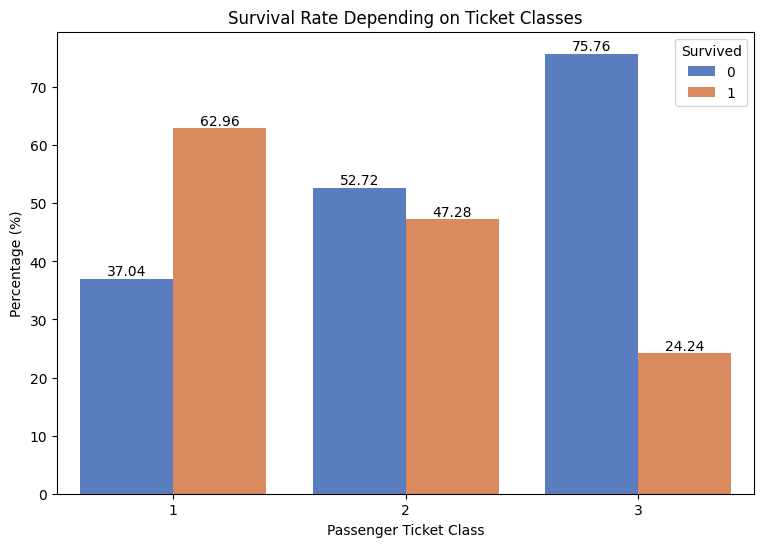

In [12]:
# creating a temporary dataframe and group it by Ticket Class, calculating the percentage of survived by each class
surv_pclass = df.groupby("Pclass")["Survived"].value_counts(normalize=True).mul(100).round(2).reset_index()
surv_pclass.rename(columns={"proportion": "Percentage"}, inplace=True)

# creating a barplot
fig, ax = plt.subplots(1,1, figsize=(9,6))
ax = sns.barplot(data=surv_pclass, x="Pclass", y="Percentage", hue="Survived", palette="muted")

# labelling the bars
for bin in ax.containers:
    ax.bar_label(bin)

# labelling the plot
ax.set_xlabel("Passenger Ticket Class")
ax.set_ylabel("Percentage (%)")
ax.set_title("Survival Rate Depending on Ticket Classes")

plt.show()

It looks like that proportionally, if someone has a Class 1 ticket they have a higher chance to survive, which is reduced to almost 50-50 with Class 2 tickets, then fairly low with a Class 3 ticket - you would only have a 24.2% survival rate.

Class 1 passengers are **38.7%** more likely to survive than Class 3 passengers in the Titanic disaster.

#### 4.2 Sex and Survival Rate

In [13]:
# looking at the survival rates for male and female
df.groupby("Sex")["Survived"].value_counts(normalize=True).unstack()

Survived,0,1
Sex,,
female,0.257962,0.742038
male,0.811092,0.188908


Wow - so it seems like the overall survival rate for female is approximately 74%, where as for male is approximately 19%.

Being a female means you are **55%** more like to survive than a male in the Titanic disaster.

#### 4.3 Ages and Survival Rate

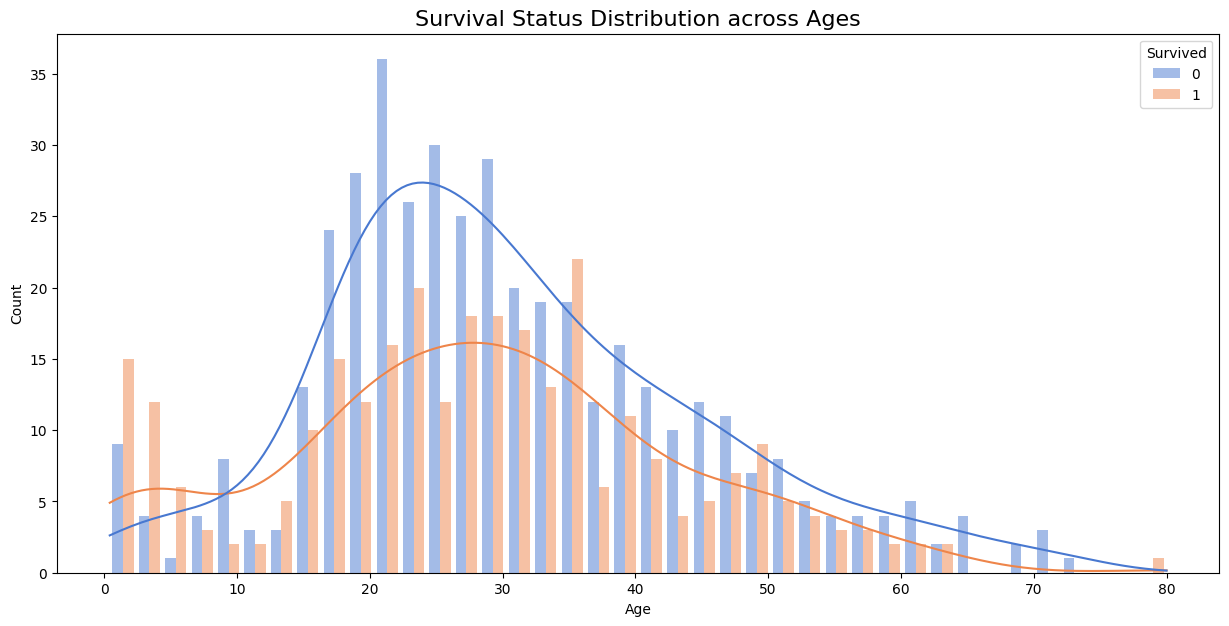

In [14]:
# creating a histogram of the distribution of age, but separated bins for survived and not survived counts
fig, ax = plt.subplots(1,1, figsize=(15,7))


sns.histplot(data=df, x="Age",bins=40, hue="Survived", kde=True, multiple="dodge",
            shrink=.8, palette="muted", ec="None", ax=ax)

ax.set_title("Survival Status Distribution across Ages", fontsize=16)
plt.show()

Overall from the age distribution, it seems like most people on board are between 20-35 years old, there are also quite a few young babies.

Looking at both histograms above, it looks like you have a higher chance of survival if you are a young passenger (perhaps up to 8 years old) as well as if you are around 80 years old. It looks like the survival rage around 20 years old is the lowest.

#### 4.4 Number of siblings / spouses aboard and Survival Rate

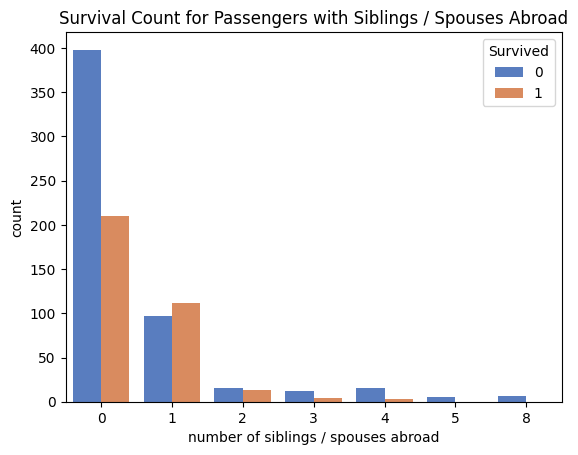

In [15]:
# creating a count plot to visualise the data
sns.countplot(data=df, x="SibSp", hue="Survived", palette="muted")

plt.xlabel("number of siblings / spouses abroad")
plt.title("Survival Count for Passengers with Siblings / Spouses Abroad")
plt.show()

#### 4.5 Number of parents / children aboard and Survival Rate

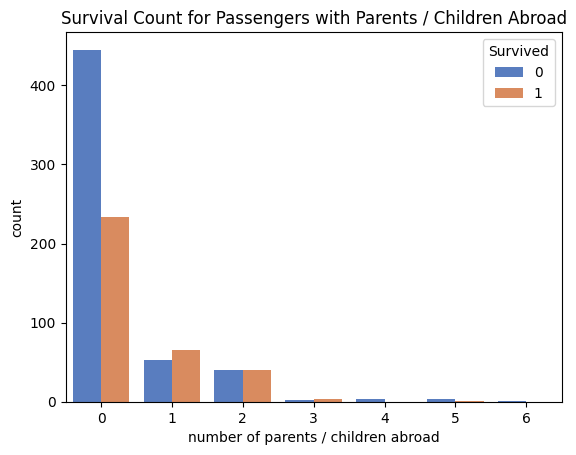

In [16]:
# creating a count plot to visualise the data
sns.countplot(data=df, x="Parch", hue="Survived", palette="muted")

plt.xlabel("number of parents / children abroad")
plt.title("Survival Count for Passengers with Parents / Children Abroad")
plt.show()

It looks like for both variables (passengers with either siblings / spouses on board, or parents / children on board), the survival rate goes over 50% when you have 1 other relative or family with you. 

#### 4.6 Fare and Survival Rate

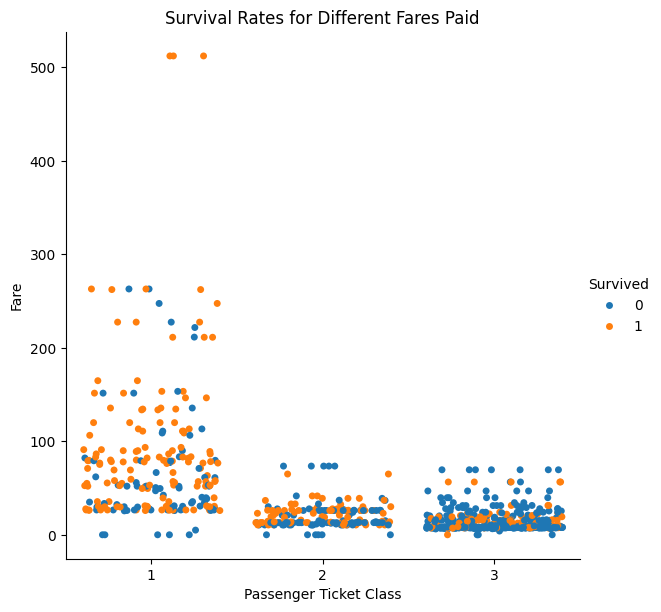

In [17]:
# looking at the survival rates for different fares paid using a category plot
sns.catplot(data=df, x="Pclass", y="Fare", hue="Survived", height=6, jitter=0.4)

plt.xlabel("Passenger Ticket Class")
plt.ylabel("Fare")
plt.title("Survival Rates for Different Fares Paid")
plt.show()

There are visually more blue dots in Class 3, and more orange in Class 1.

It also seems like in Class 1, there are a few outlier data where the fare is over 500 (unit missing), this seems unusual where most of the fare is way under, and in Class 1 the fare is mostly under approx. 280. This should be taken into consideration when preparing the dataset for modelling and prediction.

#### 4.7 Port of Embarkation and Survival Rate

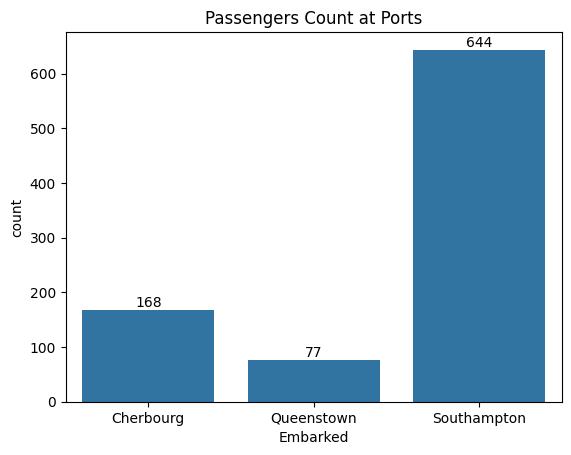

In [18]:
# sorting the towns into alphabetical order
embarked_order = ["Cherbourg", "Queenstown", "Southampton"]

# firstly creating a count plot for the overall number of passengers from each embarked town
ax = sns.countplot(data=df, x="Embarked", order=embarked_order)

for bin in ax.containers:
    ax.bar_label(bin)

ax.set_title("Passengers Count at Ports")
plt.show()

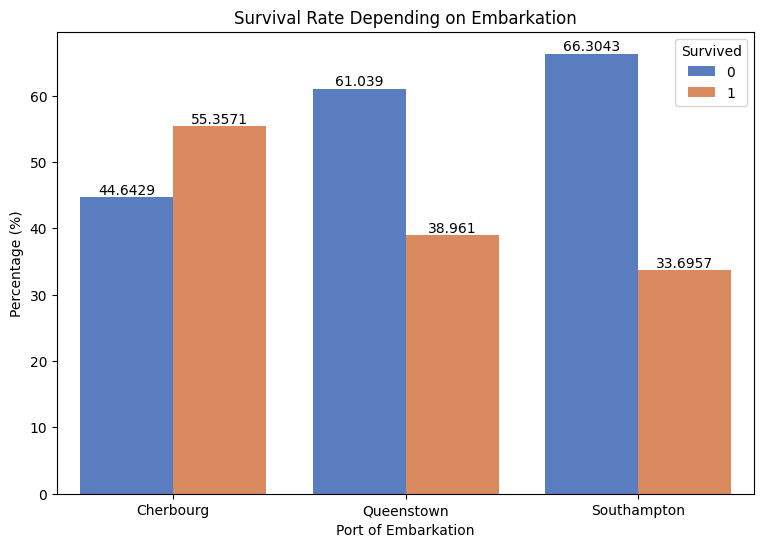

In [19]:
# secondly look at the survival rate for each embarkation town
# creating a temporary dataframe by grouping the df by Embarked Town, calculating the survival rate in percentages for each town
surv_embarked = df.groupby("Embarked")["Survived"].value_counts(normalize=True).mul(100).reset_index()
surv_embarked.rename(columns={"proportion": "Percentage"}, inplace=True)

fig, ax = plt.subplots(1,1, figsize=(9,6))
ax = sns.barplot(data=surv_embarked, x="Embarked", y="Percentage", order=embarked_order, hue="Survived", palette="muted")

for bin in ax.containers:
    ax.bar_label(bin)

ax.set_xlabel("Port of Embarkation")
ax.set_ylabel("Percentage (%)")
ax.set_title("Survival Rate Depending on Embarkation")

plt.show()

Interestingly there are some correlation between embarked town and the passenger's survival rate - even though logically this shouldn't play a part in how likely you can survive.

For passengers embarked at Queenstown, this forms a very small proportion in the dataset - only 77 people. However the survival rate is inline with the overall survival rate of the dataset - approx 38%.

Then Interestingly, for passengers who embarked at Cherbourg it seems like they have a much higher survival rate, and in Southampton is lower than average. I am wondering if this is related to their ticket class.

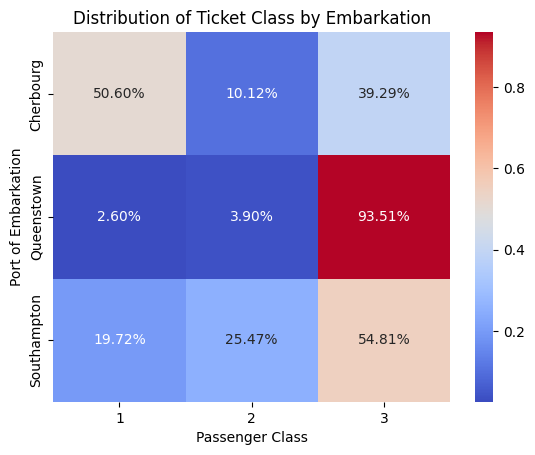

In [20]:
# creating a heatmap to show correlation between embarked town and passengers' ticket class
sns.heatmap(df.groupby("Embarked")["Pclass"].value_counts(True).unstack(),
            annot=True, fmt=".2%", cmap="coolwarm")

plt.xlabel("Passenger Class")
plt.ylabel("Port of Embarkation")
plt.title("Distribution of Ticket Class by Embarkation")

plt.show()

From the heatmap, we can tell that majority of the passenger embarked at Cherbourg are in Cass 1 (more than 50%), which explains why the Cherbourg passengers have a higher survival rate. Southampton passengers on the other hand, have 54.81% in Class 3, which also explains why the lower than overall (average) survival rate.

## 5. Further Considerations for Data Preperation

#### 5.1 Handling Outliers

When looking at fare and survival rate (4.6) we have noticed some outliers in fare, this will need to be considered and dealt with at further data processing.

#### 5.2 Missing Values

There are two categories with a significant amount of missing values - approx 20% age values are missing and 77% cabin values are missing.

We have learnt that the survival rate drops slightly when there is a missing value.

The missing value for cabin is quite high, so it is worth considering what to do with this column. If this entry is unlikely to provide critical information, or if it has any correlation with other entries in the dataset, it is possible that this column can be dropped. Otherwise, we can also impute it if "Cabin" is useful for future prediction, then the column can be encoded for further analysis.

For age, it seems like it plays an important feature in the dataset and has correlation with survival rate, thorough consideration is needed when dealing with missing values here. It is possible that an imputation method is used for fill the missing values, i.e. simple imputation method or an advanced method, so that the rows don't get to be dropped. The exact method however, needs to be investigated and tested further to see its impact, and depending on what we will want to do with the dataset (i.e. what are we trying to predict), the most appropriate method can then be selected after careful consideration.

#### 5.3 Data Preprocessing

For some of the categories that are not numerical (such as "Sex" and "Embarked"), encoding will be required for getting the data ready for the next steps to be used.

Feature scaling could also be used for scaling certain entries for fair comparison, or could be tested for handling the outliers mentioned above.

## 6. Conclusions

#### Questions and Answers:

**1. What is the most important factor in determining survival of the Titanic incident?**

From the above analysis, it looks like being a female is the highest determining factor, as we have found under 4.2, the survival rate for female is approximately 74%, where as for male is approximately 19%. This means being a female is 55% more like to survive than a male in the Titanic disaster.

**2. In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?**

The plot in the movie does align with the findings from this dataset. Under 4.1, we have found that Class 1 passengers had a higher survival rate compared to passengers from lower classes. Class 1 passengers has a survival rate of 63%, where as Class 3 passengers only have a survival rate of 24%.

**3. "Women and children first". Was this the case?**

This does seem like the case, especially for women since it is the most important factor. As we have seen in 4.3, children also have a higher survival rate. This could also be related to findings under 4.5, where a women has a child, or a child is accompanied by a mother, so that the survival rate is high when you have a parent / child.

**4. Add one other observation that you have noted in the dataset.**

One interesting observation is found under 3.1 when looking at the missing values in the dataset.

In this dataset, there are 2 observations with the "Embarked" entry missing, and interestingly, these two observations are both females and survived the disaster, they are both from cabin B28, and there are only these two passengers in this cabin B28 in this dataset.